# Om Patel - **8958837**
# Performance Metrics for Classification
# Foundations of Machine Learning Frameworks - CSCN8010

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay

## __EDA__ on MNIST

Resources used in this EDA are as follows:
- [kaggle_notebook_1](https://www.kaggle.com/code/abdoashraf90/digit-recognation-with-98-accuracy)
- [Medium_blog](https://medium.com/@24100160/mnist-dataset-exploratory-data-analysis-of-handwritten-digits-classification-9fcc3793ea7b)

In [6]:
mnist = fetch_openml('mnist_784', as_frame=True, version=1)
X, y = mnist['data'], mnist['target']

s:\Conestoga\Learning_Subject\Foundation_of_ML\Resources\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


To better understand the data lets get the description of it from the sorce of Dataset.

In [7]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Now that, we saw the discription of the MNIST Hand writen digit dataset, and done some research about the dataset on the internet. I have found following things about MNIST.
- It is an image dataset which contains *70000* images of hand written digits.
- each image has the dimentation of 28*28 pixels, which in total have 784 pixel values.
- these pixel values can be anywhere between *0* to *255* as *0* be the *white* color in an image and *255* is the *black* pixel.

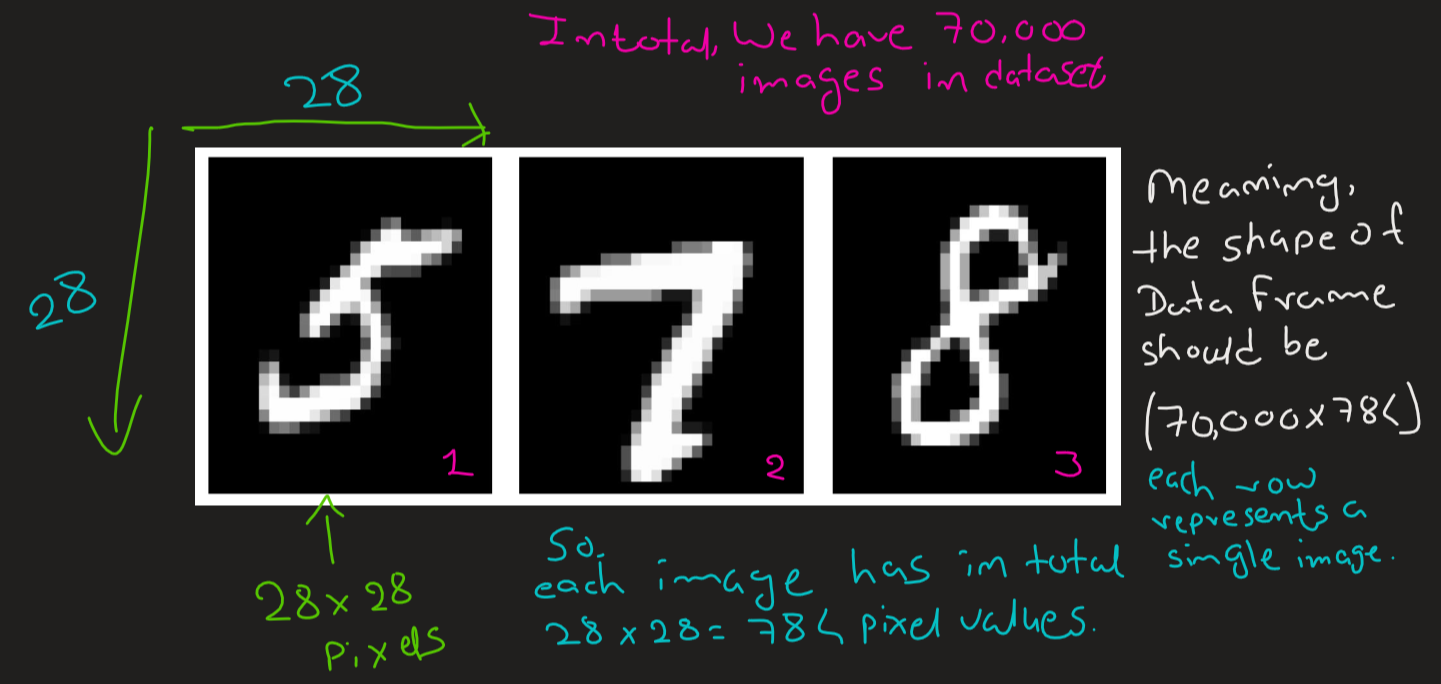

Now, we have understood the information about the Dataset lets check if there is any NULL values present in the image dataset.

In [8]:
X.isna().any().any()

False

The datase is cleaned as there is no NULL values.

Count of each number's image.

In [3]:
train_mnist = pd.read_csv("S:\Conestoga\Learning_Subject\Foundation_of_ML\Labs\Lab2\CSCN8010-LAB2\digit_mnist/train.csv")
test_mnist  = pd.read_csv("S:\Conestoga\Learning_Subject\Foundation_of_ML\Labs\Lab2\CSCN8010-LAB2\digit_mnist/test.csv")

X_train=train_mnist.drop(labels = ["label"],axis = 1)
y_train=train_mnist['label']

In [4]:
df=y_train.value_counts().reset_index()
df

,label,count
0,1,4684
1,7,4401
2,3,4351
3,9,4188
4,2,4177
5,6,4137
6,0,4132
7,4,4072
8,8,4063
9,5,3795


In [25]:
fig=px.bar(df,x='label',y='count',title='The number of images in each label')
fig.update_xaxes(range=[0, 9])
fig.show()

In [26]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## **Multiclass Classification**

### Choose the number of **Classes for Modeling**:

Our task is to work with atleast more then 2 features of the dataset. So, to fulfill this requirment we won't change the X data frame so y is also unchanged. It meand all the features are used in training of the model.

Next task is to split the dataset into Train-Validation-Test set.

Reference Notebooks:
- [Model Notebook from Hands On Machine Learning Book](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb)

In [27]:
train_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [29]:
print(train_mnist.shape, test_mnist.shape)

(42000, 785) (28000, 784)


In [35]:
train_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, there is a column named `label`.

In [31]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

As, the training data is already devided into two sections of `Data` and `Lable`. Now, it is time to do the same with tvsting data.

In [34]:
test_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that there is no column named `label` also you can see that the shape of training file and testing file is different. Meaning that there is no need to further clean the data files.

### Spliting Data:

In [7]:
X = mnist.data
y = mnist.target

In [8]:
X_train, X_new, y_train, y_new = X[:60000], X[60000:], y[:60000], y[60000:]
X_val, X_test, y_val, y_test = X_new[:5000], X_new[5000:], y_new[:5000], y_new[5000:]

### Multiclass Classification Modeling with **SVM**:

In [9]:
classify_svm = SVC(random_state=23)
classify_svm.fit(X_train, y_train)

SVC(random_state=23)

checking output of test set data and its score. and checking the possiable classes 

In [10]:
classify_svm.predict(np.array(X_test.iloc[6]).reshape(1, -1))

s:\Conestoga\Learning_Subject\Foundation_of_ML\Resources\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

In [76]:
# actual value at 6 row 
y_test.iloc[6]

'0'

In [77]:
classify_svm.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

As the value of randomly selected row is accuractly predicted, We can move forward with evaluation part.

## **Evaluation on Validation Set:**

In [11]:
val_score = classify_svm.predict(X_val)
accuracy = accuracy_score(y_val, val_score)

In [12]:
accuracy

0.97

In [13]:
val_score

array(['7', '2', '1', ..., '2', '4', '0'], dtype=object)

In [14]:
conf_matrix = confusion_matrix(y_val, val_score)
print(conf_matrix)

[[456   0   1   0   0   1   1   0   1   0]
 [  0 566   3   1   0   0   0   1   0   0]
 [  3   1 511   2   1   0   2   5   4   1]
 [  0   0   2 491   0   2   0   4   1   0]
 [  0   0   4   0 485   0   3   0   1   7]
 [  1   0   0   4   0 443   2   1   4   1]
 [  6   2   0   0   2   2 449   0   1   0]
 [  0   5   6   1   1   0   0 489   2   8]
 [  3   0   2   6   1   2   0   3 470   2]
 [  2   4   1   5   7   2   1   4   4 490]]


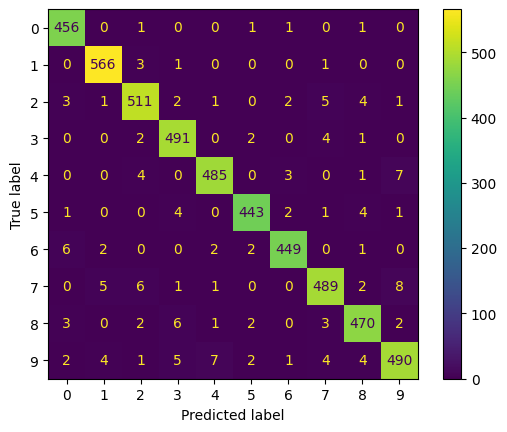

In [15]:
ConfusionMatrixDisplay.from_predictions(y_val, val_score)
plt.show()

In [16]:
precision = precision_score(y_val, val_score, average=None)
print(precision)

[0.96815287 0.97923875 0.96415094 0.9627451  0.97585513 0.9800885
 0.98034934 0.96449704 0.96311475 0.96267191]


In [17]:
recall = recall_score(y_val, val_score, average=None)
print(recall)

[0.99130435 0.99124343 0.96415094 0.982      0.97       0.97149123
 0.97186147 0.95507812 0.96114519 0.94230769]


In [18]:
f1 = f1_score(y_val, val_score, average=None)
print(f1)

[0.97959184 0.98520453 0.96415094 0.97227723 0.97291876 0.97577093
 0.97608696 0.95976447 0.96212897 0.95238095]


In [19]:
print("Accuracy of model:", accuracy, "\n")
print("Precision for each class:", precision, "\n")
print("Recall for each class:", recall, "\n")
print("F1-score for each class:", f1)

Accuracy of model: 0.97 

Precision for each class: [0.96815287 0.97923875 0.96415094 0.9627451  0.97585513 0.9800885
 0.98034934 0.96449704 0.96311475 0.96267191] 

Recall for each class: [0.99130435 0.99124343 0.96415094 0.982      0.97       0.97149123
 0.97186147 0.95507812 0.96114519 0.94230769] 

F1-score for each class: [0.97959184 0.98520453 0.96415094 0.97227723 0.97291876 0.97577093
 0.97608696 0.95976447 0.96212897 0.95238095]


Text(0.5, 1.0, 'Arithmetic (conventional) Mean')

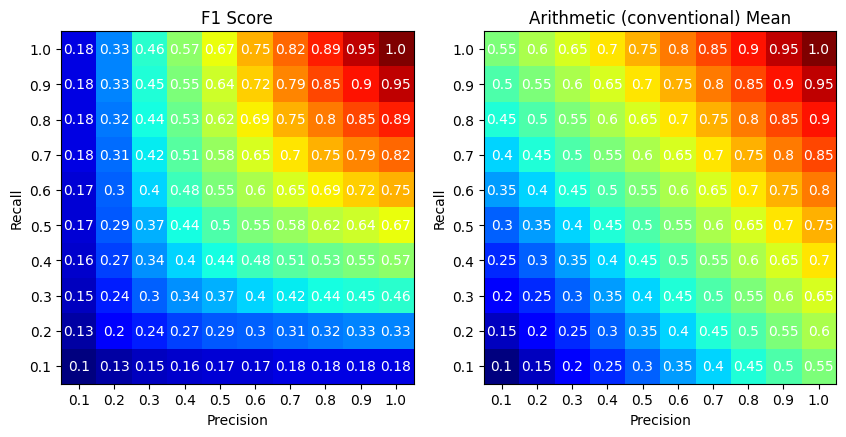

In [20]:
precision = np.round(np.linspace(0.1, 1, 10), 2)
recall = np.round(np.linspace(1, 0.1, 10), 2)

# create a mesh grid of precision and recall
precision_grid, recall_grid = np.meshgrid(precision, recall)

f1_score_calc = np.round(2 * (precision_grid * recall_grid) / (precision_grid + recall_grid), 2)
arithmetic_mean = np.round((precision_grid + recall_grid) / 2, 2)

# plot a color map of the F1 score
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)

im1 = axes[0].imshow(f1_score_calc, cmap="jet")
axes[0].set_xticks(np.arange(len(precision)), precision)
axes[0].set_yticks(np.arange(len(recall)), recall)
# Loop over data dimensions and create text annotations.
for i in range(len(precision)):
    for j in range(len(recall)):
        text = axes[0].text(j, i, f1_score_calc[i, j],
                       ha="center", va="center", color="w")
axes[0].set_xlabel("Precision")
axes[0].set_ylabel("Recall")
axes[0].set_title("F1 Score")

im2 = axes[1].imshow(arithmetic_mean, cmap="jet")
axes[1].set_xticks(np.arange(len(precision)), precision)
axes[1].set_yticks(np.arange(len(recall)), recall)
# Loop over data dimensions and create text annotations.
for i in range(len(precision)):
    for j in range(len(recall)):
        text = axes[1].text(j, i, arithmetic_mean[i, j],
                       ha="center", va="center", color="w")
axes[1].set_xlabel("Precision")
axes[1].set_ylabel("Recall")
axes[1].set_title("Arithmetic (conventional) Mean")

In [27]:
y_score = classify_svm.decision_function(X_val)

In [31]:
threshold = 3000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [33]:
y_scores = cross_val_predict(classify_svm, X_train, y_train, cv=3, method="decision_function")

In [38]:
y_test_binarized = label_binarize(y_train, classes=np.unique(y_train))
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_scores[:, i])

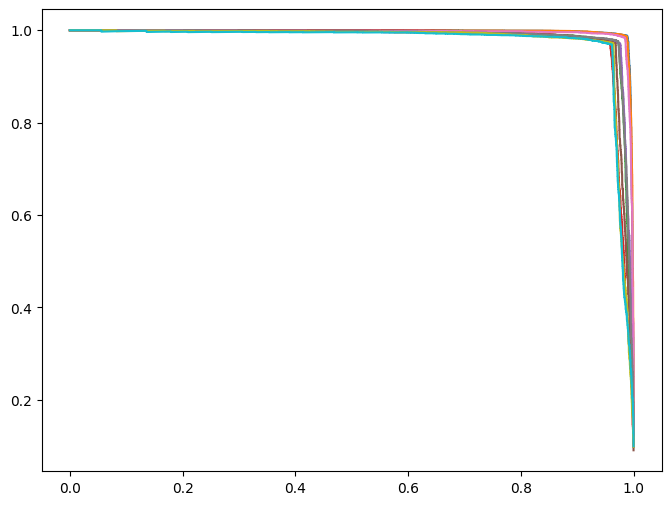

In [39]:
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

### Insights:

This is the Precision - Recall graph we got for all 10 classes. we can see that for all of the classes precision and recall is around 99%. This means that the model is performing well in terms of both minimizing false positives (precision) and false negatives (recall).

![imag](https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png)

Also, it means with the high precision the ratio of true positive predictions to the total number of positive predictions made by the model are accurate.
[sorce-image](https://www.analyticsvidhya.com/blog/2021/06/evaluate-your-model-metrics-for-image-classification-and-detection/)

Now lets, Increase precision without retraining the model, suppose we want to increase precision for class 2 without retraining the model

In [46]:
class_to_increase_precision = 2
class_indices = np.where(y_val == class_to_increase_precision)[0]
val_score[class_indices] = class_to_increase_precision
updated_precision = precision_score(y_val, val_score, average=None)
print("Updated Precision for each class:", updated_precision)

Updated Precision for each class: [0.96815287 0.97923875 0.96415094 0.9627451  0.97585513 0.9800885
 0.98034934 0.96449704 0.96311475 0.96267191]


After that lets increase recall, we want to increase recall for class 7 without retraining.

### Checking for Testing Data

In [54]:
test_pred = classify_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Accuracy on test set: {test_accuracy:.2f}")

Accuracy on test set: 0.99
